# Convolutional Neural Network Example

Build a convolutional neural network with TensorFlow.

This example is using TensorFlow layers API, see 'convolutional_network_raw' example
for a raw TensorFlow implementation with variables.

- Author: V.M. adapted from Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

## CNN Overview

![CNN](http://personal.ie.cuhk.edu.hk/~ccloy/project_target_code/images/fig3.png)

## MNIST Dataset Overview

This example is using MNIST handwritten digits. The dataset contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 1. For simplicity, each image has been flattened and converted to a 1-D numpy array of 784 features (28*28).

![MNIST Dataset](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

More info: http://yann.lecun.com/exdb/mnist/

In [20]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras import backend as k 
from keras import optimizers
from keras.engine import Input, Model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.layers import Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,  EarlyStopping



Import the data

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Plot some images

8
7
5
8
7


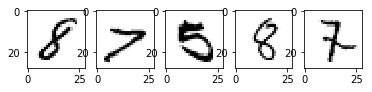

In [5]:
%matplotlib inline
plt.subplot(1,5,1)
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')
plt.subplot(1,5,2)
image_index = 1302 # You may select anything up to 60,000
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')
plt.subplot(1,5,3)
image_index = 31302 # You may select anything up to 60,000
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')
plt.subplot(1,5,4)
image_index = 21432 # You may select anything up to 60,000
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')
plt.subplot(1,5,5)
image_index = 54378 # You may select anything up to 60,000
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

Reshaping the images

In [6]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

n_samples =  x_train.shape[0]
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [8]:
batch_size = 128


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(x_train, y_train,batch_size=batch_size)
validation_generator = train_datagen.flow(x_train, y_train,batch_size=batch_size)
test_generator = test_datagen.flow(x_test)

Initializations

In [16]:
# Training Parameters
learning_rate = 0.001
epochs = 40 # small number of epoch to save time (it should be increased)

# Network Parameters
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)
dropout = 0.25 # Dropout, probability to drop a unit

img_width, img_height = 28, 28

Model definition

In [10]:
# Creating a Sequential Model and adding the layers

conv_net_in = Input(shape=(img_width, img_height, 1))
# First 2D convolution Layer
# Convolution Layer with 32 filters and a kernel size of 5
conv_net = Conv2D(32, (5, 5))(conv_net_in)
conv_net = Activation("relu")(conv_net)
# Max Pooling (down-sampling) with strides of 2 and kernel size of 2
conv_net = MaxPooling2D()(conv_net)
# Second 2D convolution Layer
conv_net = Conv2D(64, (3, 3), padding="same")(conv_net)
conv_net = Activation("relu")(conv_net)
conv_net = MaxPooling2D()(conv_net)
# Flatten the data to a 1-D vector for the fully connected layer
conv_net = Flatten()(conv_net)

# first fully connected
conv_net = Dense(1024)(conv_net)
conv_net = Activation('relu')(conv_net)
conv_net = Dropout(dropout)(conv_net)

# Output
conv_net = Dense(10)(conv_net)
conv_net = Activation('softmax')(conv_net)


conv_model = Model(conv_net_in, conv_net)

conv_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
activation_2 (Activat

Hyper parameter for the learnng task

In [21]:
adam = optimizers.Adam(lr=learning_rate)

conv_model.compile(optimizer=adam, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

patience = 4
early  = EarlyStopping(monitor = 'val_loss', patience = patience,
                                     verbose = 1, mode = 'auto')

checkpointer = ModelCheckpoint(filepath="CNN_MNIST_best_weights.hdf5", 
                               monitor = 'val_acc',
                               verbose=1, 
                               save_best_only=True)


Fit/learn the model

In [22]:
conv_model.fit_generator(
        train_generator,
        steps_per_epoch=n_samples/batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=100,
        callbacks=[checkpointer,early])

Epoch 1/40
469/468 [==============================] - 33s 71ms/step - loss: 0.0069 - acc: 0.9978 - val_loss: 0.0062 - val_acc: 0.9981

Epoch 00001: val_acc improved from -inf to 0.99813, saving model to CNN_MNIST_best_weights.hdf5
Epoch 2/40
469/468 [==============================] - 34s 72ms/step - loss: 0.0071 - acc: 0.9977 - val_loss: 0.0037 - val_acc: 0.9988

Epoch 00002: val_acc improved from 0.99813 to 0.99875, saving model to CNN_MNIST_best_weights.hdf5
Epoch 3/40
469/468 [==============================] - 35s 74ms/step - loss: 0.0062 - acc: 0.9978 - val_loss: 0.0023 - val_acc: 0.9991

Epoch 00003: val_acc improved from 0.99875 to 0.99906, saving model to CNN_MNIST_best_weights.hdf5
Epoch 4/40
469/468 [==============================] - 35s 75ms/step - loss: 0.0048 - acc: 0.9986 - val_loss: 0.0017 - val_acc: 0.9992

Epoch 00004: val_acc improved from 0.99906 to 0.99922, saving model to CNN_MNIST_best_weights.hdf5
Epoch 5/40
469/468 [==============================] - 36s 76ms/step

Save the best model

In [23]:
conv_model.load_weights('CNN_MNIST_best_weights.hdf5')
conv_model.save('CNN_MNIST.h5')


Validation on the test set

In [24]:
from sklearn.metrics import confusion_matrix
y_proba = conv_model.predict(x_test/255.)
C = y_proba.argmax(axis=-1) 
#print(C[:10])

M = confusion_matrix(y_test,C)
print("Confusion matrix")
print(M)

print("Classification error: ", np.round((1-np.sum(np.diag(M))/np.shape(x_test)[0])*100,2),"%")


Confusion matrix
[[ 979    0    0    0    0    0    0    0    0    1]
 [   0 1134    0    0    0    0    1    0    0    0]
 [   2    0 1023    0    0    0    0    6    1    0]
 [   0    0    0 1007    0    2    0    0    1    0]
 [   0    0    0    0  974    0    2    0    0    6]
 [   1    1    0    7    0  882    1    0    0    0]
 [   5    2    0    0    1    0  948    0    2    0]
 [   0    0    1    0    0    0    0 1025    1    1]
 [   3    0    2    0    0    1    0    3  962    3]
 [   1    0    0    0    4    1    0    3    2  998]]
Classification error:  0.68 %


Plot the 32  filters of the first convolution layer



(5, 5, 1, 32)


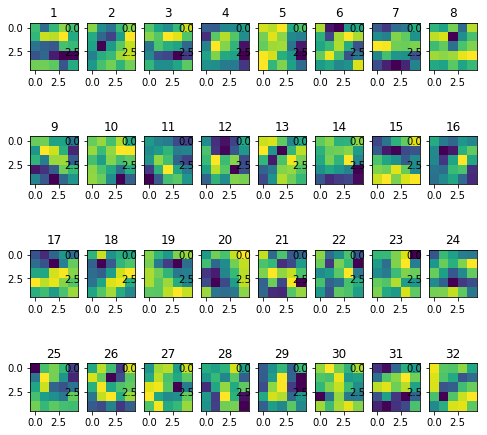

In [25]:
weights, biases = conv_model.layers[1].get_weights()
print(weights.shape)

plt.figure(figsize=(8,8))
for k in range(weights.shape[3]):
  plt.subplot(4,8,k+1)
  plt.imshow(weights[:,:,0,k])
  plt.title(str(k+1))

Plot some intermediate layers

[<tf.Tensor 'input_1:0' shape=(?, 28, 28, 1) dtype=float32>, <tf.Tensor 'conv2d_1/BiasAdd:0' shape=(?, 24, 24, 32) dtype=float32>, <tf.Tensor 'activation_1/Relu:0' shape=(?, 24, 24, 32) dtype=float32>, <tf.Tensor 'max_pooling2d_1/MaxPool:0' shape=(?, 12, 12, 32) dtype=float32>, <tf.Tensor 'conv2d_2/BiasAdd:0' shape=(?, 12, 12, 64) dtype=float32>, <tf.Tensor 'activation_2/Relu:0' shape=(?, 12, 12, 64) dtype=float32>, <tf.Tensor 'max_pooling2d_2/MaxPool:0' shape=(?, 6, 6, 64) dtype=float32>]
(28, 28, 1)
(1, 28, 28, 1)
(28, 28, 1)


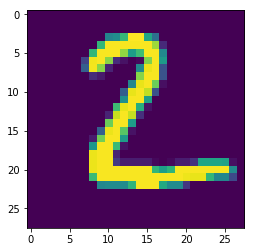

(1, 24, 24, 32)


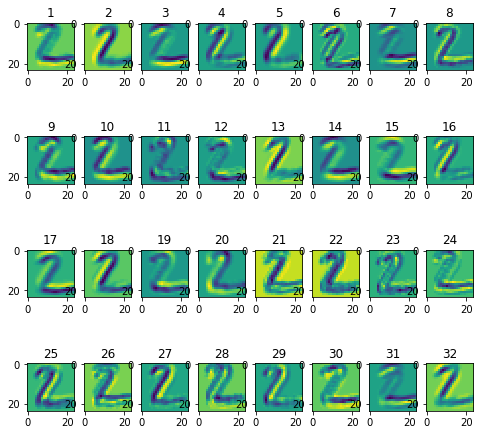

In [26]:
from keras import models
from keras.preprocessing import image

layer_outputs = [layer.output for layer in conv_model.layers[:7]] 
# Extracts the outputs of the top layers

print(layer_outputs )
activation_model = models.Model(inputs=conv_model.input, outputs=layer_outputs[1]) # Creates a model that will return these outputs, given the model input
#activation_model.summary()

img = np.reshape(x_test[1,:,:],(28,28,1))
print(img.shape)
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

print(img_tensor[0].shape)

plt.imshow(img_tensor[0,:,:,0])
plt.show()

activations = activation_model.predict(img_tensor/255.) # Returns a  Numpy array corresponding to the output of layer 2
print(activations.shape)

# Show the result of the 1st convolution

plt.figure(figsize=(8,8))
for k in range(activations.shape[3]):
  plt.subplot(4,8,k+1)
  plt.imshow(activations[0,:,:,k])
  plt.title(str(k+1))

(1, 24, 24, 32)


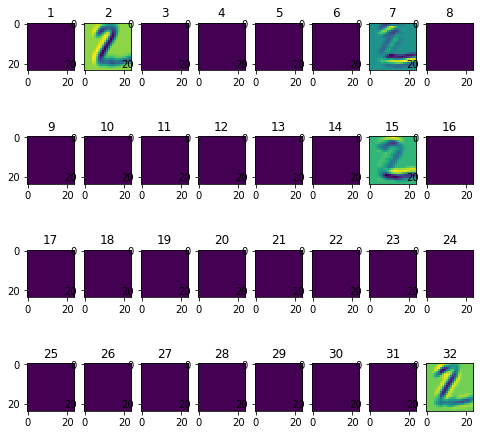

In [27]:
activation_model = models.Model(inputs=conv_model.input, outputs=layer_outputs[2]) # Creates a model that will return these outputs, given the model input


activations = activation_model.predict(img_tensor/255.) # Returns a  Numpy array corresponding to the output of layer 2
print(activations.shape)

# Show the result of the 1st Relu activation

plt.figure(figsize=(8,8))
for k in range(activations.shape[3]):
  plt.subplot(4,8,k+1)
  plt.imshow(activations[0,:,:,k])
  plt.title(str(k+1))

(1, 12, 12, 32)


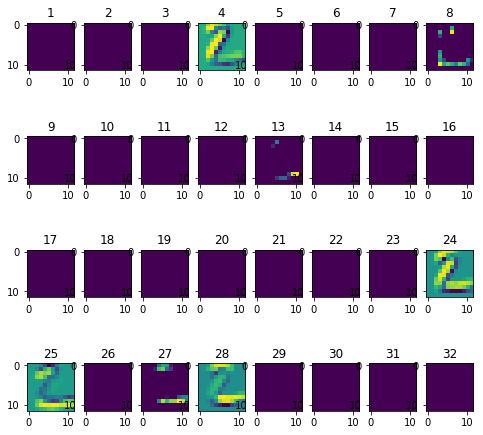

In [16]:
activation_model = models.Model(inputs=conv_model.input, outputs=layer_outputs[3]) # Creates a model that will return these outputs, given the model input


activations = activation_model.predict(img_tensor/255.) # Returns a  Numpy array corresponding to the output of layer 4
print(activations.shape)

# Show the result of the 1st Max Pooling

plt.figure(figsize=(8,8))
for k in range(activations.shape[3]):
  plt.subplot(4,8,k+1)
  plt.imshow(activations[0,:,:,k])
  plt.title(str(k+1))